In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt


In [150]:
#reading the CSV file
df = pd.read_csv("C:\\Users\\Gacheru\\Downloads\\history.csv")
df.head()

,2021,28.71
0,2020,18.40
1,2019,31.49
2,2018,-4.38
3,2017,21.83
4,2016,11.96


In [151]:
#renaming the coloumns since they had years and return as they coloumn names

df.rename(columns = {'2021':'Year', '28.71':'% Return'}, inplace = True)

In [152]:
df.tail()

,Year,% Return
90,1930,-24.90
91,1929,-8.42
92,1928,43.61
93,1927,37.49
94,1926,11.62


In [153]:
#adding a new row with the missing data
new_row = pd.DataFrame({"Year":2021,"% Return":28.71},index=[0])
df = pd.concat([new_row, df]).reset_index(drop = True)

In [168]:
df.describe()

,Year,% Return
count,96.000000,96.000000
mean,1973.500000,12.327604
std,27.856777,19.632006
min,1926.000000,-43.340000
25%,1949.750000,-0.555000
50%,1973.500000,14.685000
75%,1997.250000,26.567500
max,2021.000000,53.990000


In [191]:
#looking at the data tyes
df.tail()


,Year,% Return,decade,Return_Classification
91,1930,-24.90,Decade 1,Extremely Low
92,1929,-8.42,Decade 1,Extremely Low
93,1928,43.61,Decade 1,Extremely High
94,1927,37.49,Decade 1,Extremely High
95,1926,11.62,None,High


In [156]:
#creating a funct to categorize the years based on decades
def filter(x):
    if x <= 1930:
        return "Decade 1"
    if (x > 1931 and x <=1940 ):
        return "Decade 1"
    if (x > 1941 and x <=1950 ):
        return "Decade 2"
    if (x > 1951 and x <=1960 ):
        return "Decade 3"
    if (x > 1961 and x <=1970 ):
        return "Decade 4"
    if (x > 1980 and x <=1990 ):
        return "Decade 5"
    if (x > 1990 and x <=2000 ):
        return "Decade 6"
    if (x > 2001 and x <=2010 ):
        return "Decade 7"
    if (x > 2011 and x <=2021 ):
        return "Decade 8"
    if (x > 2013 and x <= 2023):
        return "Decade 9"
    
#applying the function to the df"Year" column
df["decade"] = df["Year"].apply(filter)
df

,Year,% Return,decade
0,2021,28.71,Decade 9
1,2020,18.40,Decade 9
2,2019,31.49,Decade 9
3,2018,-4.38,Decade 9
4,2017,21.83,Decade 9
...,...,...,...
91,1930,-24.90,Decade 1
92,1929,-8.42,Decade 1
93,1928,43.61,Decade 1
94,1927,37.49,Decade 1


In [158]:
#lets take a look at the average mean of the data for the period
df_mean = df["% Return"].mean()
df_mean


12.327604166666662

In [159]:
#median calculation of the data
df_median = df["% Return"].median()
df_median

14.685

In [169]:
#min and max of the returns
max_return = df['% Return'].max()
max_return


53.99

In [170]:
min_return = df["% Return"].min()
min_return

-43.34

In [160]:
#standard deviation and the variance of the data set
df_std_dev = df["% Return"].std()


#the data has a very high stand deviation from the mean

In [161]:
#calculating the variance of the returns
import statistics
df_var = statistics.variance(df["% Return"])
df_var


385.4156689364035

In [162]:
#skewness 
import scipy
return_skewness = scipy.stats.skew(df["% Return"],axis=0,bias=True)
return_skewness
#the skewness is negative, mean is on the left, mode highest pint on the right and median middle


-0.4187607320811005

In [163]:
#kurtosis measure of describing shape of a prob distr of its tailedness
#it evaluates the thich or thin of the tails compared to normal distr
#skweness is diff the tail of the distr ased on xtreme values
#kurtosis measures wextreme values in either tails
return_kurtosis = scipy.stats.kurtosis(df["% Return"],fisher=False)
return_kurtosis

3.0465301755564416

<AxesSubplot:xlabel='decade', ylabel='% Return'>

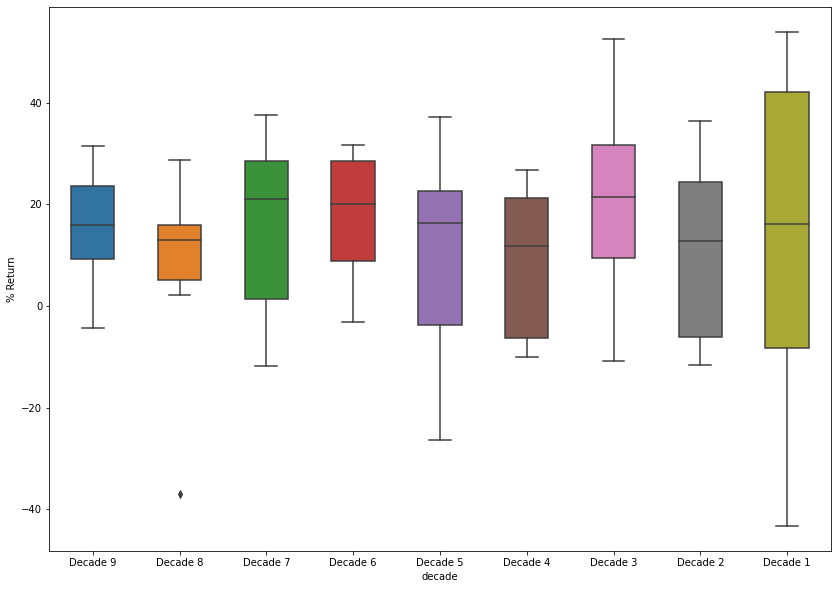

In [164]:
#start visualization of the numerical data based on decade
#boxplot - of the distr of returns per generation
fig,ax = plt.subplots(figsize=(14,10))
sns.boxplot(data=df,y="% Return",x="decade",width= 0.5)


In [179]:
#categirize returns as High, Low and Medium
def cat_return(x):
    if x <= 0:
        return "Extremely Low"
    if (x > 1 and x <= 5):
        return "Low"
    if (x > 6 and x <= 10 ):
        return " Medium"
    if (x > 11 and x <= 20):
        return "High"
    if (x > 21 and x <= 100):
        return " Extremely High"
#applying the function to the df"return" column
df["Return_Classification"] = df["% Return"].apply(cat_return)
df

,Year,% Return,decade,Return_Classification
0,2021,28.71,Decade 9,Extremely High
1,2020,18.40,Decade 9,High
2,2019,31.49,Decade 9,Extremely High
3,2018,-4.38,Decade 9,Extremely Low
4,2017,21.83,Decade 9,Extremely High
...,...,...,...,...
91,1930,-24.90,Decade 1,Extremely Low
92,1929,-8.42,Decade 1,Extremely Low
93,1928,43.61,Decade 1,Extremely High
94,1927,37.49,Decade 1,Extremely High


<AxesSubplot:xlabel='count', ylabel='Return_Classification'>

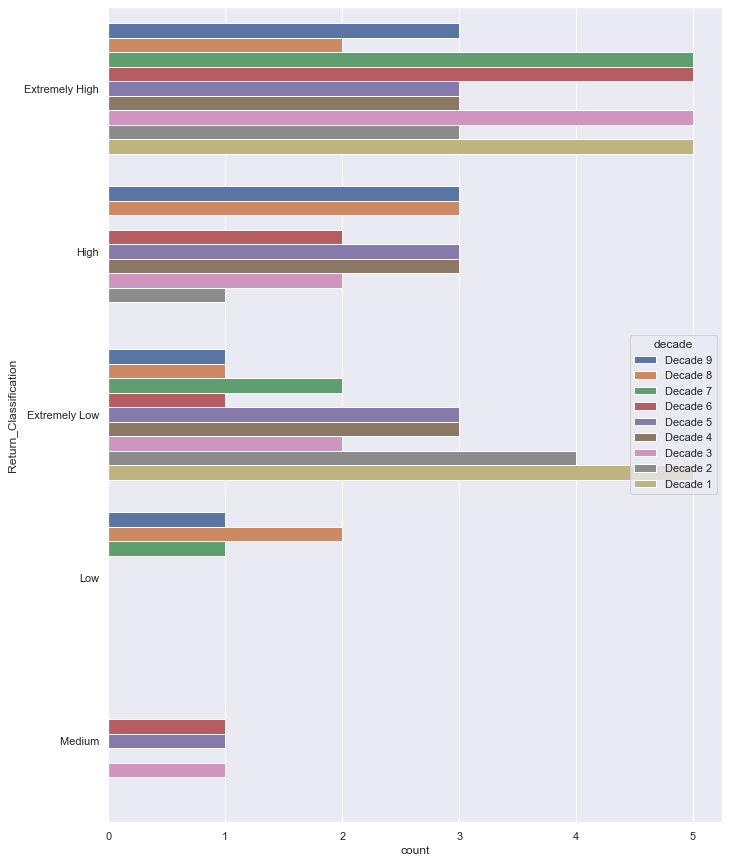

In [185]:
#creating a countplot to vizualize the Return classificatio data with the decade data
sns.set(rc={"figure.figsize":(11,15)})
sns.countplot(hue="decade",y="Return_Classification",data=df)

In [188]:
df.head()

,Year,% Return,decade,Return_Classification
0,2021,28.71,Decade 9,Extremely High
1,2020,18.40,Decade 9,High
2,2019,31.49,Decade 9,Extremely High
3,2018,-4.38,Decade 9,Extremely Low
4,2017,21.83,Decade 9,Extremely High


In [189]:
#analysis of decade 6
decade_six = df.loc[df['decade'] == "Decade 6"]
decade_six

,Year,% Return,decade,Return_Classification
30,1991,30.47,Decade 6,Extremely High
31,1990,-3.10,Decade 6,Extremely Low
32,1989,31.69,Decade 6,Extremely High
33,1988,16.61,Decade 6,High
34,1987,5.25,Decade 6,None
35,1986,18.67,Decade 6,High
36,1985,31.73,Decade 6,Extremely High
37,1984,6.27,Decade 6,Medium
38,1983,22.56,Decade 6,Extremely High
39,1982,21.55,Decade 6,Extremely High
